##1. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  # Radial Basis Function (RBF) Kernel
svm_classifier.fit(X_train, y_train)  # Train the model

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Classifier on Iris dataset: {accuracy:.2f}")


Accuracy of SVM Classifier on Iris dataset: 1.00


##2. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracie

In [ ]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of SVM (Linear Kernel): {accuracy_linear:.2f}")
print(f"Accuracy of SVM (RBF Kernel): {accuracy_rbf:.2f}")

if accuracy_linear > accuracy_rbf:
    print("Linear SVM performs better!")
elif accuracy_rbf > accuracy_linear:
    print("RBF SVM performs better!")
else:
    print("Both models perform equally well!")


Accuracy of SVM (Linear Kernel): 1.00
Accuracy of SVM (RBF Kernel): 0.81
Linear SVM performs better!


##3. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

In [ ]:
# Boston

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_model.fit(X_train, y_train)  # Train the model

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of SVR Model: {mse:.2f}")


Mean Squared Error of SVR Model: 0.66


##4. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

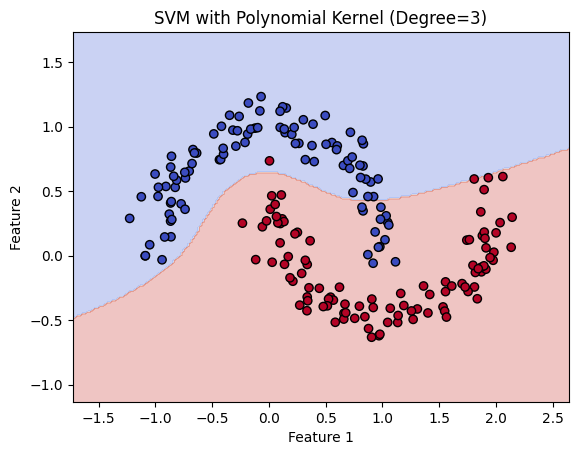

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)  # Non-linearly separable data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_poly = SVC(kernel='poly', degree=3, C=1.0)  # Polynomial kernel with degree 3
svm_poly.fit(X_train, y_train)

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM with Polynomial Kernel (Degree=3)")
    plt.show()

plot_decision_boundary(svm_poly, X, y)


##5 Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

In [ ]:
from sklearn.naive_bayes import GaussianNB

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset: {accuracy:.2f}")


Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset: 0.97


##6. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limiting features for performance
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multinomial Naïve Bayes on 20 Newsgroups dataset: {accuracy:.2f}")


Accuracy of Multinomial Naïve Bayes on 20 Newsgroups dataset: 0.79


##7. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

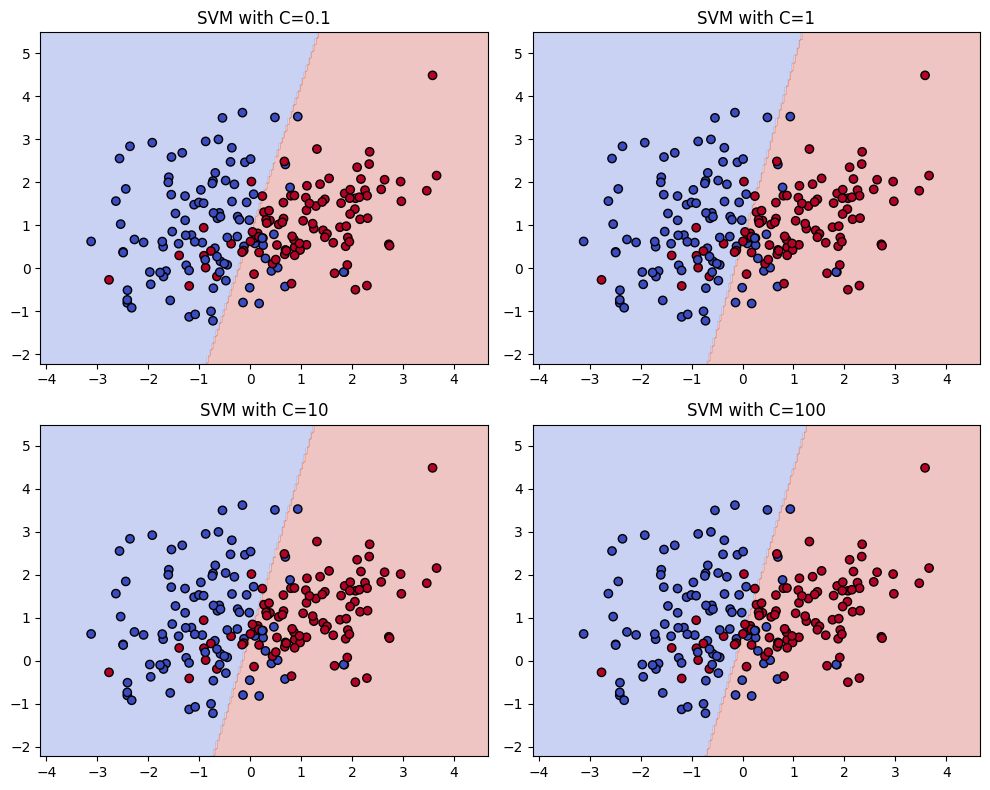

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = [0.1, 1, 10, 100]
svm_models = [SVC(kernel='linear', C=C).fit(X_train, y_train) for C in C_values]

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)

plt.figure(figsize=(10, 8))
for i, (C, model) in enumerate(zip(C_values, svm_models), 1):
    plt.subplot(2, 2, i)
    plot_decision_boundary(model, X, y, title=f"SVM with C={C}")

plt.tight_layout()
plt.show()


##28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

In [ ]:
X = np.array([
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [1, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0]
])

y = np.array([1, 0, 1, 0, 1, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = BernoulliNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

new_sample = np.array([[1, 1, 0, 1]])
prediction = model.predict(new_sample)
print(f"Predicted Class for new sample: {prediction[0]}")


Model Accuracy: 1.00
Predicted Class for new sample: 0


##9. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = np.array([
    [10, 200],
    [15, 300],
    [20, 250],
    [25, 400],
    [30, 500],
    [35, 450],
    [40, 600],
    [45, 700]
])

y = np.array([0, 0, 0, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model_no_scaling = SVC(kernel='linear')
svm_model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = svm_model_no_scaling.predict(X_test)

accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy without Feature Scaling: {accuracy_no_scaling:.2f}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model_with_scaling = SVC(kernel='linear')
svm_model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = svm_model_with_scaling.predict(X_test_scaled)

accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print(f"Accuracy with Feature Scaling: {accuracy_with_scaling:.2f}")


Accuracy without Feature Scaling: 1.00
Accuracy with Feature Scaling: 1.00


##10. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = np.array([
    [2.5, 50],
    [3.0, 55],
    [3.5, 60],
    [4.0, 65],
    [4.5, 70],
    [5.0, 75],
    [5.5, 80],
    [6.0, 85]
])

y = np.array([0, 0, 0, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb_no_smoothing = GaussianNB(var_smoothing=0)
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)

accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
print(f"Accuracy without Laplace Smoothing: {accuracy_no_smoothing:.2f}")

gnb_with_smoothing = GaussianNB()
gnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)

accuracy_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)
print(f"Accuracy with Laplace Smoothing: {accuracy_with_smoothing:.2f}")

print(f"Predictions without Laplace Smoothing: {y_pred_no_smoothing}")
print(f"Predictions with Laplace Smoothing: {y_pred_with_smoothing}")


Accuracy without Laplace Smoothing: 1.00
Accuracy with Laplace Smoothing: 1.00
Predictions without Laplace Smoothing: [0 1]
Predictions with Laplace Smoothing: [0 1]


##11. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,gamma, kernel).

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV


X, y = make_classification(n_samples=100, n_features=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Best Hyperparameters: {accuracy:.2f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Model Accuracy with Best Hyperparameters: 1.00


##12. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

In [ ]:
from sklearn.metrics import  classification_report

X, y = make_classification(n_samples=1000, n_features=5, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model_no_weighting = SVC(kernel='linear', random_state=42)
svm_model_no_weighting.fit(X_train, y_train)
y_pred_no_weighting = svm_model_no_weighting.predict(X_test)

accuracy_no_weighting = accuracy_score(y_test, y_pred_no_weighting)
print(f"Accuracy without Class Weighting: {accuracy_no_weighting:.2f}")
print("Classification Report without Class Weighting:\n", classification_report(y_test, y_pred_no_weighting))

svm_model_with_weighting = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model_with_weighting.fit(X_train, y_train)
y_pred_with_weighting = svm_model_with_weighting.predict(X_test)

accuracy_with_weighting = accuracy_score(y_test, y_pred_with_weighting)
print(f"Accuracy with Class Weighting: {accuracy_with_weighting:.2f}")
print("Classification Report with Class Weighting:\n", classification_report(y_test, y_pred_with_weighting))


Accuracy without Class Weighting: 0.95
Classification Report without Class Weighting:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       185
           1       0.75      0.60      0.67        15

    accuracy                           0.95       200
   macro avg       0.86      0.79      0.82       200
weighted avg       0.95      0.95      0.95       200

Accuracy with Class Weighting: 0.91
Classification Report with Class Weighting:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       185
           1       0.43      0.87      0.58        15

    accuracy                           0.91       200
   macro avg       0.71      0.89      0.76       200
weighted avg       0.95      0.91      0.92       200



##13. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

data = {
    'Email': [
        "Congratulations! You won a free lottery. Claim now.",
        "Reminder: Your appointment is scheduled for tomorrow.",
        "Urgent! Your bank account needs verification.",
        "Hello, just checking in to see how you're doing.",
        "Win cash prizes by clicking this link now!",
        "Can we reschedule our meeting for next week?",
        "You've been selected for a special discount offer.",
        "Let's catch up over coffee this weekend."
    ],
    'Label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham']
}

df = pd.DataFrame(data)

df['Label'] = df['Label'].map({'spam': 1, 'ham': 0})

X_train, X_test, y_train, y_test = train_test_split(df['Email'], df['Label'], test_size=0.2, random_state=42, stratify=df['Label'])

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred = nb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##14. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


data = {
    'Email': [
        "Congratulations! You won a free lottery. Claim now.",
        "Reminder: Your appointment is scheduled for tomorrow.",
        "Urgent! Your bank account needs verification.",
        "Hello, just checking in to see how you're doing.",
        "Win cash prizes by clicking this link now!",
        "Can we reschedule our meeting for next week?",
        "You've been selected for a special discount offer.",
        "Let's catch up over coffee this weekend.",
        "Exclusive offer! Buy one, get one free.",
        "Your credit card has been temporarily suspended!",
        "Happy birthday! Enjoy a special discount today.",
        "Final warning! Update your account details now."
    ],
    'Label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam']
}

df = pd.DataFrame(data)

df['Label'] = df['Label'].map({'spam': 1, 'ham': 0})

X_train, X_test, y_train, y_test = train_test_split(df['Email'], df['Label'], test_size=0.3, random_state=42, stratify=df['Label'])

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)
y_pred_nb = nb_classifier.predict(X_test_vec)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vec, y_train)
y_pred_svm = svm_classifier.predict(X_test_vec)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Naïve Bayes Accuracy: {accuracy_nb:.2f}")
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


Naïve Bayes Accuracy: 0.50
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

SVM Accuracy: 0.50
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

##15. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

In [29]:
from sklearn.feature_selection import SelectKBest, chi2

data = {
    'Email': [
        "Congratulations! You won a free lottery. Claim now.",
        "Reminder: Your appointment is scheduled for tomorrow.",
        "Urgent! Your bank account needs verification.",
        "Hello, just checking in to see how you're doing.",
        "Win cash prizes by clicking this link now!",
        "Can we reschedule our meeting for next week?",
        "You've been selected for a special discount offer.",
        "Let's catch up over coffee this weekend.",
        "Exclusive offer! Buy one, get one free.",
        "Your credit card has been temporarily suspended!",
        "Happy birthday! Enjoy a special discount today.",
        "Final warning! Update your account details now."
    ],
    'Label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam']
}

df = pd.DataFrame(data)

df['Label'] = df['Label'].map({'spam': 1, 'ham': 0})

X_train, X_test, y_train, y_test = train_test_split(df['Email'], df['Label'], test_size=0.3, random_state=42, stratify=df['Label'])

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
y_pred_without_fs = nb_classifier.predict(X_test_tfidf)

k_best = 5
selector = SelectKBest(chi2, k=k_best)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = selector.transform(X_test_tfidf)

nb_classifier_fs = MultinomialNB()
nb_classifier_fs.fit(X_train_selected, y_train)
y_pred_with_fs = nb_classifier_fs.predict(X_test_selected)

accuracy_without_fs = accuracy_score(y_test, y_pred_without_fs)
accuracy_with_fs = accuracy_score(y_test, y_pred_with_fs)

print(f"Accuracy WITHOUT Feature Selection: {accuracy_without_fs:.2f}")
print("Classification Report WITHOUT Feature Selection:\n", classification_report(y_test, y_pred_without_fs))

print(f"\nAccuracy WITH Feature Selection: {accuracy_with_fs:.2f}")
print("Classification Report WITH Feature Selection:\n", classification_report(y_test, y_pred_with_fs))


Accuracy WITHOUT Feature Selection: 0.50
Classification Report WITHOUT Feature Selection:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4


Accuracy WITH Feature Selection: 0.50
Classification Report WITH Feature Selection:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

##16. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

In [31]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

svm_ovr = SVC(kernel='linear', decision_function_shape='ovr')
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)

svm_ovo = SVC(kernel='linear', decision_function_shape='ovo')
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)

accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"One-vs-Rest (OvR) Accuracy: {accuracy_ovr:.2f}")
print("One-vs-Rest (OvR) Classification Report:\n", classification_report(y_test, y_pred_ovr))

print(f"\nOne-vs-One (OvO) Accuracy: {accuracy_ovo:.2f}")
print("One-vs-One (OvO) Classification Report:\n", classification_report(y_test, y_pred_ovo))


One-vs-Rest (OvR) Accuracy: 0.94
One-vs-Rest (OvR) Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.91      0.95      0.93        21
           2       1.00      0.87      0.93        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54


One-vs-One (OvO) Accuracy: 0.94
One-vs-One (OvO) Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.91      0.95      0.93        21
           2       1.00      0.87      0.93        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



##17. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

In [32]:

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear Kernel Accuracy: {accuracy_linear:.2f}")
print("Classification Report (Linear Kernel):\n", classification_report(y_test, y_pred_linear))

print(f"\nPolynomial Kernel Accuracy: {accuracy_poly:.2f}")
print("Classification Report (Polynomial Kernel):\n", classification_report(y_test, y_pred_poly))

print(f"\nRBF Kernel Accuracy: {accuracy_rbf:.2f}")
print("Classification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf))


Linear Kernel Accuracy: 0.96
Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Polynomial Kernel Accuracy: 0.92
Classification Report (Polynomial Kernel):
               precision    recall  f1-score   support

           0       0.95      0.83      0.89        42
           1       0.91      0.97      0.94        72

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114


RBF Kernel Accuracy: 0.93
Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.92   

##18. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

In [33]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Fold Accuracy: {accuracy:.4f}")

average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy across 5 folds: {average_accuracy:.4f}")


Fold Accuracy: 0.9474
Fold Accuracy: 0.9298
Fold Accuracy: 0.9561
Fold Accuracy: 0.9386
Fold Accuracy: 0.9646

Average Accuracy across 5 folds: 0.9473


##19.Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

In [34]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
y_pred_default = nb_default.predict(X_test)

custom_priors = [0.3, 0.7]
nb_custom = GaussianNB(priors=custom_priors)
nb_custom.fit(X_train, y_train)
y_pred_custom = nb_custom.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

print(f"Default Priors Accuracy: {accuracy_default:.4f}")
print("Classification Report (Default Priors):\n", classification_report(y_test, y_pred_default))

print(f"\nCustom Priors Accuracy: {accuracy_custom:.4f}")
print("Classification Report (Custom Priors):\n", classification_report(y_test, y_pred_custom))


Default Priors Accuracy: 0.9386
Classification Report (Default Priors):
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Custom Priors Accuracy: 0.9474
Classification Report (Custom Priors):
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



##20. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

In [35]:
from sklearn.feature_selection import RFE

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_full = SVC(kernel='linear')
svm_full.fit(X_train, y_train)
y_pred_full = svm_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

svm_rfe = SVC(kernel='linear')
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Accuracy with All Features: {accuracy_full:.4f}")
print("Classification Report (All Features):\n", classification_report(y_test, y_pred_full))

print(f"\nAccuracy with Selected Features (RFE): {accuracy_rfe:.4f}")
print("Classification Report (RFE Selected Features):\n", classification_report(y_test, y_pred_rfe))

selected_features = np.where(rfe.support_)[0]
print(f"\nSelected Feature Indices: {selected_features}")


Accuracy with All Features: 0.9561
Classification Report (All Features):
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Accuracy with Selected Features (RFE): 0.9123
Classification Report (RFE Selected Features):
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114


Selected Feature Indices: [ 0  4  7  8 11 24 25 26 27 28]



##21. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.9467
Recall: 0.9861
F1-Score: 0.9660

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**##22. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).**

In [38]:
from sklearn.metrics import log_loss


cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_prob = nb_model.predict_proba(X_test)

log_loss_value = log_loss(y_test, y_prob)

print(f"Log Loss (Cross-Entropy Loss): {log_loss_value:.4f}")


Log Loss (Cross-Entropy Loss): 0.3713


##23. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

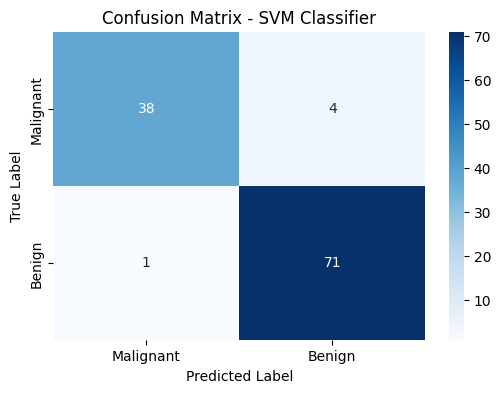


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


##24. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

Mean Absolute Error (MAE): 0.8181


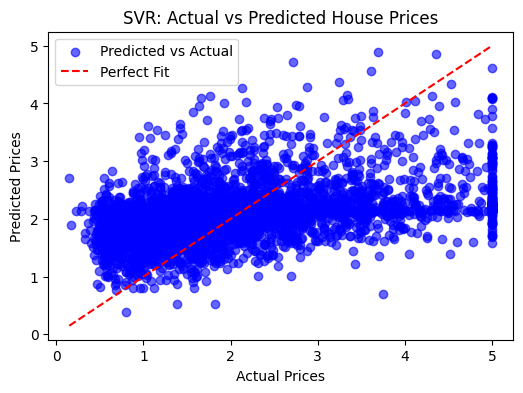

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR: Actual vs Predicted House Prices")
plt.legend()
plt.show()

##25. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

ROC-AUC Score: 0.9878


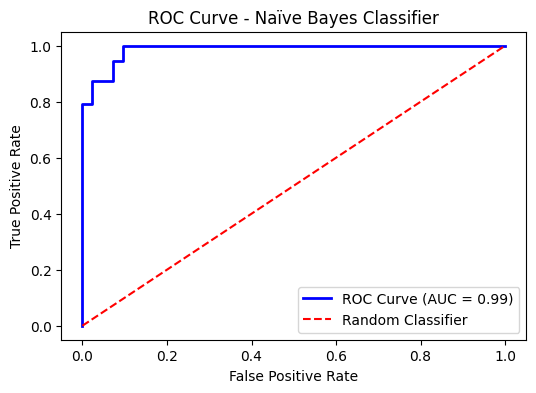

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_prob = nb_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)

fpr, tpr, _ = roc_curve(y_test, y_prob)

print(f"ROC-AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='dashed', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes Classifier")
plt.legend()
plt.show()


##26. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

Average Precision Score: 0.9979


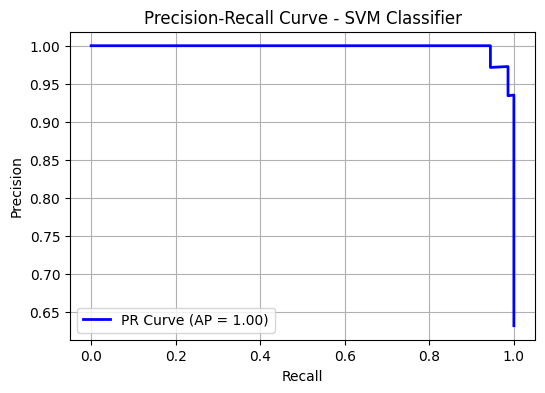

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_prob = svm_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)

avg_precision = average_precision_score(y_test, y_prob)

print(f"Average Precision Score: {avg_precision:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM Classifier")
plt.legend()
plt.grid()
plt.show()
